**Lojistik Regresyon ile Sınıflandırma Modeli**

Kesikli Veriler
- Belirli sayıda değer alabilir. 

Sürekli Veriler
- Bir aralıktaki tüm değerleri alabilir.

Lineer Regresyon Modeli sürekli verilerin tahmini için kullanılır. 
Lojistik regresyon ise kesikli değişkenlerin tahmini için kullanılır.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
# Örnek veri seti
df = pd.DataFrame(data={
    'Maaş': [3000, 2000, 3200, 1000, 1800],
    'Kredi': [1, 0, 1, 0, 1]
})
df

,Maaş,Kredi
0,3000,1
1,2000,0
2,3200,1
3,1000,0
4,1800,1


Text(0, 0.5, 'Kredi')

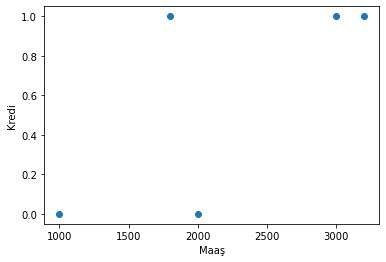

In [4]:
# dağılım grafiği
plt.scatter(df['Maaş'], df['Kredi'])
plt.xlabel('Maaş')
plt.ylabel('Kredi')

In [5]:
# doğrusal model
x = df['Maaş'].values.reshape(-1, 1)
y = df['Kredi']
model = LinearRegression()
model.fit(x, y)

LinearRegression()

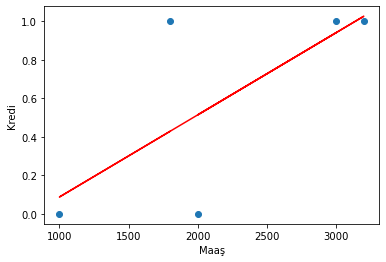

In [6]:
# regresyon çizgisi
beta_1, beta_0 = np.polyfit(df['Maaş'], df['Kredi'], 1)
plt.scatter(df['Maaş'], df['Kredi'])
plt.xlabel('Maaş')
plt.ylabel('Kredi')
plt.plot(x, beta_0 + beta_1 * x, color='red')

Kredi değişkeni sadece 0-1 değerlerini alabilmektedir. Bu nedenle regresyon çizgisinin 0 ile 1 aralığına sınırlandırılması ve sadece 0-1 değerlerini alabilecek şekilde yeniden düzenlenmesi gerekir.
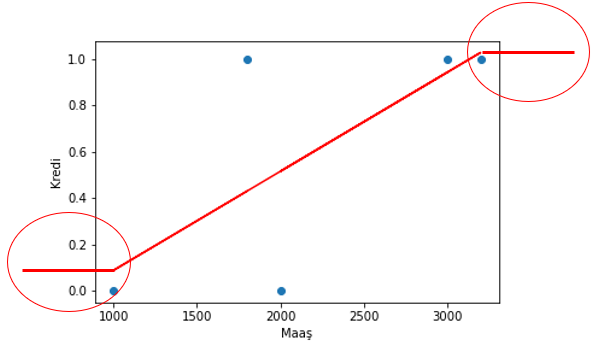

## Logit Fonksiyonu

0 ile 1 arasındaki değerleri - sonsuz + sonsuz aralığına getirir.

$logit(P)=ln⁡(P/(1-P))$

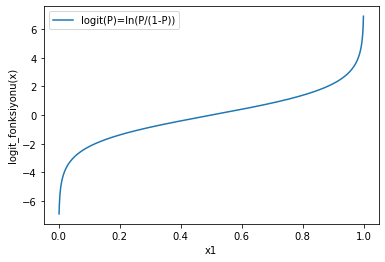

In [7]:
def logit_fonksiyonu(x):
    return np.log(x / (1 - x))


x1 = np.linspace(0.001, 0.999, 1000)
plt.plot(x1, logit_fonksiyonu(x1), label="logit(P)=ln⁡(P/(1-P))")
plt.xlabel("x1")
plt.ylabel("logit_fonksiyonu(x)")
plt.legend()

## Lojistik Fonksiyonu (Sigmoid)

Lojistik fonksiyonu girilen değerleri 0 ile 1 arasına getirir. 

$S(x)=\frac{1}{1+e^{-x}}$

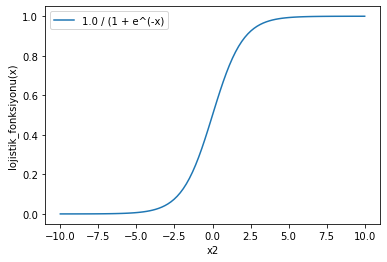

In [8]:
def lojistik_fonksiyonu(x):
    return 1.0 / (1 + np.exp(-x))


x2 = np.linspace(-10, 10, 100)
plt.plot(x2, lojistik_fonksiyonu(x2), label="1.0 / (1 + e^(-x)")
plt.xlabel("x2")
plt.ylabel("lojistik_fonksiyonu(x)")
plt.legend()

In [12]:
lojistik_fonksiyonu(10)

0.9999546021312976

Grafikteki eğri regresyon çalışmalarındaki regresyon çizgisi olarak düşünülebilir. Basit lojistik regresyonda bir adet bağımsız değişken bulunur. Bu değişkenin olasılığı aşağıdaki formülle gösterilebilir.

$$P=\frac{1}{1+e^{\beta_0+\beta_1\times x}}$$

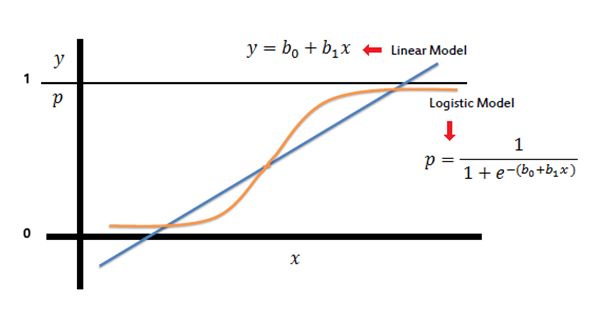

## Örnek Çalışma

Cinsiyet + yaş + maaş değişkenlerinin kredi değişkenini etkilediği durumun çalışmasını yapalım.

In [13]:
dataset = pd.read_excel("kredi_veriseti.xlsx")
dataset.head()

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


,cinsiyet,yas,maas,kredi
0,Erkek,22,2200,0
1,Erkek,38,2300,0
2,Kadın,29,4600,0
3,Kadın,30,6000,0
4,Erkek,22,7900,0


In [15]:
#one hot encoding kategorik değişkenleri 0-1 değişkene dönüştürür.
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot_cinsiyet = one_hot.fit_transform(dataset['cinsiyet'].values.reshape(
    -1, 1)).toarray()

In [16]:
# Kategoriler
one_hot.categories_

[array(['Erkek', 'Kadın'], dtype=object)]

In [17]:
# yeni veri seti
one_hot_df = pd.DataFrame(one_hot_cinsiyet, columns=one_hot.categories_)
one_hot_df.head()

,Erkek,Kadın
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [18]:
# iki tablonun birleştirilmesi
one_hot_df2 = dataset.join(one_hot_df)
one_hot_df2.head()

,cinsiyet,yas,maas,kredi,"(Erkek,)","(Kadın,)"
0,Erkek,22,2200,0,1.0,0.0
1,Erkek,38,2300,0,1.0,0.0
2,Kadın,29,4600,0,0.0,1.0
3,Kadın,30,6000,0,0.0,1.0
4,Erkek,22,7900,0,1.0,0.0


In [19]:
# cinsiyet düşürülebilir.
one_hot_df2.drop('cinsiyet', axis=1, inplace=True)

In [20]:
one_hot_df2.head()

,yas,maas,kredi,"(Erkek,)","(Kadın,)"
0,22,2200,0,1.0,0.0
1,38,2300,0,1.0,0.0
2,29,4600,0,0.0,1.0
3,30,6000,0,0.0,1.0
4,22,7900,0,1.0,0.0


In [21]:
# one-hot işlemi pandas getdummies fonksiyonu ile de yapılabilir.
df_getdummy = pd.get_dummies(dataset, columns=['cinsiyet'])

In [22]:
df_getdummy

,yas,maas,kredi,cinsiyet_Erkek,cinsiyet_Kadın
0,22,2200,0,1,0
1,38,2300,0,1,0
2,29,4600,0,0,1
3,30,6000,0,0,1
4,22,7900,0,1,0
...,...,...,...,...,...
395,49,4400,1,0,1
396,54,2600,1,1,0
397,53,2300,1,0,1
398,39,3600,0,1,0


In [23]:
# x ve y değişkenleri
X = one_hot_df2.drop('kredi', axis=1)
y = one_hot_df2['kredi']

In [24]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [26]:
# ölçeklendirme
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
# modelleme
model = LogisticRegression(random_state=0)
# Grid Search CV sklearn içerisinde parametre optimizasyonu için fonksiyon var.

model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
# tahmin sonuçları
y_pred = model.predict(X_test)

In [31]:
# parametre tahminleri
print(model.intercept_, model.coef_)

[-1.13035642] [[ 1.84356965  1.09078635  0.03543114 -0.03543114]]


In [32]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [33]:
y_test.values

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [34]:
# performans değerlendirmesi
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[78,  2],
       [19, 33]], dtype=int64)

Doğruların sayısı 78+33 = 111 yanlışların sayısı 2+19 = 21

In [35]:
# doğruluk oranı
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8409090909090909

In [36]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        80
           1       0.94      0.63      0.76        52

    accuracy                           0.84       132
   macro avg       0.87      0.80      0.82       132
weighted avg       0.86      0.84      0.83       132



Precision(Kesinlik) — Tahminlerinizin yüzde kaçı doğru?
Kesinlik, bir sınıflandırıcının aslında negatif olan bir örneği pozitif olarak etiketlememe yeteneğidir. Her sınıf için, gerçek pozitiflerin gerçek pozitif ve yanlış pozitiflerin toplamına oranı olarak tanımlanır.
Precision: Pozitif tahminlerin doğruluğu.
Precision = TP/(TP + FP)

---

Recall — Pozitif durumların yüzde kaçı tahmin edildi?
Recall = TP/(TP+FN)

---

F1 score — Pozitif tahminlerin yüzde kaçı doğru?
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

---

Support
Destek, belirtilen veri kümesindeki sınıfın gerçek durumlarının sayısıdır. Eğitim verilerindeki dengesiz destek, sınıflandırıcının rapor edilen puanlarındaki yapısal zayıflıkları gösterebilir ve örnekleme veya yeniden dengeleme ihtiyacını gösterebilir. Destek, modeller arasında değişmez, bunun yerine değerlendirme sürecini teşhis eder.

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

The thing is, precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless.

I would say that you don't really need to look at these metrics for this problem , unless a given class should absolutely be correctly determined.

To answer your other question, you cannot compare the precision and the recall over two classes. This only means you're classifier is better to find class 0 over class 1.

Precision and recall of sklearn.metrics.precision_score or recall_score should not be different. But as long as the code is not provided, this is impossible to determine the root cause of this.

In [ ]:
ROC Eğrileri

Tanı ile ilgili performans 